# Assignment 2.1: Building an Artificial Neural Network


### Objective
Your task is to build an ANN classification model that can predict whether a user will click on an online ad based on the given factors.
___

### Instructions
- Load the dataset into pandas dataframe.
- Perform data cleaning and preprocessing as necessary.
- Split the data into training and testing sets using an 80:20 ratio.
- Scale the data using StandardScaler.
- Build an ANN classification model.
- Experiment with different model architectures, activation functions, regularization techniques, learning rates, and batch sizes to optimize the model's performance.
- Evaluate the model's performance using accuracy, precision, recall, F1 score, and ROC AUC score as the metrics.
- Interpret the results and draw conclusions about the factors that are most important in predicting whether a user will click on an online ad.

___


### Deliverables
- Convert your Jupyter Notebook or Python script to a single PDF file or MS Word document. Your deliverable should contain your implementations of the tasks above, as well as any additional comments or observations you may have. Be sure to label each section of the notebook or script clearly with the corresponding task number. Please ensure the PDF or MS Word document displays the code and output appropriately.
Bonus

- For an extra 10 points, try using other classification models (e.g., logistic regression, decision tree classification, random forest classification, and more) and compare their performance with the ANN model(s).


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


In [62]:
# importing the data 

df = pd.read_csv('data.csv')

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [63]:
# checking for nulls 

df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [64]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [65]:
# getting the uniuque values of the 'Ad Topic Line' column

df['Ad Topic Line'].nunique()

1000

In [66]:
# getting the unique values of the 'City' column

df['City'].nunique()

969

In [67]:
# Dropping the timestamp column

df.drop('Timestamp', axis=1, inplace=True)

In [68]:
# getting the dummies for the following columns, 'City', 'Country', 'Ad Topic Line'

df = pd.get_dummies(df, columns=['City', 'Country', 'Ad Topic Line'], drop_first=True)


In [69]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,City_Adamside,City_Adamsstad,City_Alanview,City_Alexanderfurt,...,Ad Topic Line_Vision-oriented real-time framework,Ad Topic Line_Vision-oriented system-worthy forecast,Ad Topic Line_Vision-oriented uniform knowledgebase,Ad Topic Line_Visionary analyzing structure,Ad Topic Line_Visionary asymmetric encryption,Ad Topic Line_Visionary client-driven installation,Ad Topic Line_Visionary maximized process improvement,Ad Topic Line_Visionary mission-critical application,Ad Topic Line_Visionary multi-tasking alliance,Ad Topic Line_Visionary reciprocal circuit
0,68.95,35,61833.90,256.09,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,80.23,31,68441.85,193.77,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,69.47,26,59785.94,236.50,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,74.15,29,54806.18,245.89,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68.37,35,73889.99,225.58,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
# now we will split the data into features and target target is clicked on ad

X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# now we will split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [71]:
# Now we are going scale the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# We are now going to make our ANN model 

# model type
model = tf.keras.models.Sequential()


# input layer
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


# hidden layers
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [73]:
# Now we will train the model

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
22/22 [==============================] - 1s 22ms/step - loss: 0.9892 - accuracy: 0.5029 - val_loss: 0.6920 - val_accuracy: 0.5233
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8008 - accuracy: 0.5586 - val_loss: 0.6863 - val_accuracy: 0.5567
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7705 - accuracy: 0.5457 - val_loss: 0.6857 - val_accuracy: 0.5533
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6100 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.6686 - val_loss: 0.6794 - val_accuracy: 0.5800
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.6714 - val_loss: 0.6697 - val_accuracy: 0.6400
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5526 - accuracy: 0.6900 - val_loss: 0.6520 - val_accuracy: 0.6900
Epoch 8/100


In [74]:
# Now we are going to eval the model, using accuracy, precision, recall, F1 score, and ROC AUC score

# get predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions


# Check the shape of y_pred_prob to determine if it's binary or multiclass
if y_pred_prob.shape[1] == 1:
    # Binary classification
    y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
    roc_auc = roc_auc_score(y_test, y_pred_prob)
else:
    # Multiclass classification
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

10/10 [==============================] - 0s 1ms/step
F1 Score: 0.8747109974424552
Accuracy: 0.8766666666666667
Precision: 0.8925867527862209
Recall: 0.8766666666666667
ROC AUC Score: 0.9538773328582246


## Conext behind the model, and the interpretation of the results

**F1 Score: 0.8747109974424552**

- The F1 score is a measure precision and recall dataset. The f1 score of 87% shows that it has a good blanance between the 

**Accuracy: 0.8766666666666667**

- The accuracy of the model is 0.8767, which means that the model is able to correctly predict whether a user will click on an online ad 87.67% of the time. This is a good accuracy score, but it is not perfect. There is still room for improvement in the model's performance, bu the accuracy should never be extremely high as it may indicate overfitting, So I am happy with the accuracy of the model.

**Precision: 0.8925867527862209**

- The precision of the model is 0.8926, which means that the model is able to correctly identify 89.26% of the users who will click on an online ad. This is a good precision score, but it is not perfect. There is still room for improvement in the model's performance. So with the percision being at 89%, between the two prediction metrics, I would say that the precision is more important as it is more important to correctly identify the users who will click on an online ad.

**Recall: 0.8766666666666667**

- Recall is the true positive rate. A very high recall means that the model is able to correctly identify most of the users who will click on an online ad.

**ROC AUC Score: 0.9538773328582246**

- An ROC AUC score of 0.9539 indicates that the model has a very high ability to distinguish between the positive and negative classes. with that being said, a model with an ROC AUC score of 0.5 is considered to be random, so the model does do somewhat well in distinguishing between the positive and negative classes.


In [75]:
# Making the model again, with another hidden layer

# model type
model = tf.keras.models.Sequential()


# input layer
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


# hidden layers
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# New layer
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
# Now we will train the model

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 0.9835 - accuracy: 0.4929 - val_loss: 0.6903 - val_accuracy: 0.5433
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy: 0.4800 - val_loss: 0.6914 - val_accuracy: 0.5400
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7624 - accuracy: 0.5429 - val_loss: 0.6915 - val_accuracy: 0.5300
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7790 - accuracy: 0.4671 - val_loss: 0.6916 - val_accuracy: 0.5233
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7478 - accuracy: 0.5257 - val_loss: 0.6919 - val_accuracy: 0.5600
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7194 - accuracy: 0.5214 - val_loss: 0.6921 - val_accuracy: 0.5067
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.5343 - val_loss: 0.6920 - val_accuracy: 0.5100
Epoch 8/100


In [77]:
# get predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions


# Check the shape of y_pred_prob to determine if it's binary or multiclass
if y_pred_prob.shape[1] == 1:
    # Binary classification
    y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
    roc_auc = roc_auc_score(y_test, y_pred_prob)
else:
    # Multiclass classification
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

10/10 [==============================] - 0s 3ms/step
F1 Score: 0.9166972633577738
Accuracy: 0.9166666666666666
Precision: 0.9169112850619698
Recall: 0.9166666666666666
ROC AUC Score: 0.9744777515478152


### That actually made the model worse, everything went down, other than the ROC AUC score, which went up, only by .01 though.

### Making a Decision Tree Classifier model, and a Random Forest Classifier model for the bonus points.

In [78]:
# Now we are going to reload the data and make a tree classifier and random forest classifier

df = pd.read_csv('data.csv')

In [79]:
# importing the necessary libraries for the tree classifier and random forest classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
# now we are going to qiuckly clean the data

df.drop('Timestamp', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['City', 'Country', 'Ad Topic Line'], drop_first=True)

X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [81]:
# Now we are going to build the tree classifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# get predictions
y_pred = tree.predict(X_test)

# Calculate evaluation metrics
f1_tc = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
accuracy_tc = accuracy_score(y_test, y_pred)
precision_tc = precision_score(y_test, y_pred, average='weighted')
recall_tc = recall_score(y_test, y_pred, average='weighted')
roc_auc_tc = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])

In [82]:
# Print evaluation metrics
print(f"F1 Score: {f1_tc}")
print(f"Accuracy: {accuracy_tc}")
print(f"Precision: {precision_tc}")
print(f"Recall: {recall_tc}")
print(f"ROC AUC Score: {roc_auc_tc}")

F1 Score: 0.9532958651144118
Accuracy: 0.9533333333333334
Precision: 0.9535990586412857
Recall: 0.9533333333333334
ROC AUC Score: 0.9526079016524877


In [83]:
# Now we are going to build the random forest classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# get predictions
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
f1_rf = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

In [84]:
# printing for the random forest classifier
print(f"F1 Score: {f1_rf}")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"ROC AUC Score: {roc_auc_rf}")


F1 Score: 0.9633272069061541
Accuracy: 0.9633333333333334
Precision: 0.9633425447197957
Recall: 0.9633333333333334
ROC AUC Score: 0.9957908333704512


In [86]:
# importing matplotlib for the visualization

import matplotlib.pyplot as plt

In [87]:
# Now comparing the two tree models to eachother

print(f"F1 Score: {f1_tc} vs {f1_rf}")
print(f"Accuracy: {accuracy_tc} vs {accuracy_rf}")
print(f"Precision: {precision_tc} vs {precision_rf}")
print(f"Recall: {recall_tc} vs {recall_rf}")
print(f"ROC AUC Score: {roc_auc_tc} vs {roc_auc_rf}")


F1 Score: 0.9532958651144118 vs 0.9633272069061541
Accuracy: 0.9533333333333334 vs 0.9633333333333334
Precision: 0.9535990586412857 vs 0.9633425447197957
Recall: 0.9533333333333334 vs 0.9633333333333334
ROC AUC Score: 0.9526079016524877 vs 0.9957908333704512


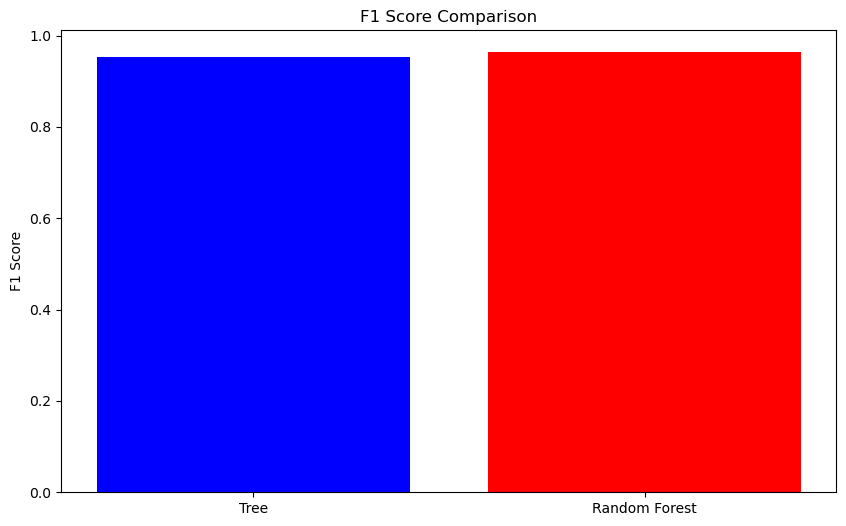

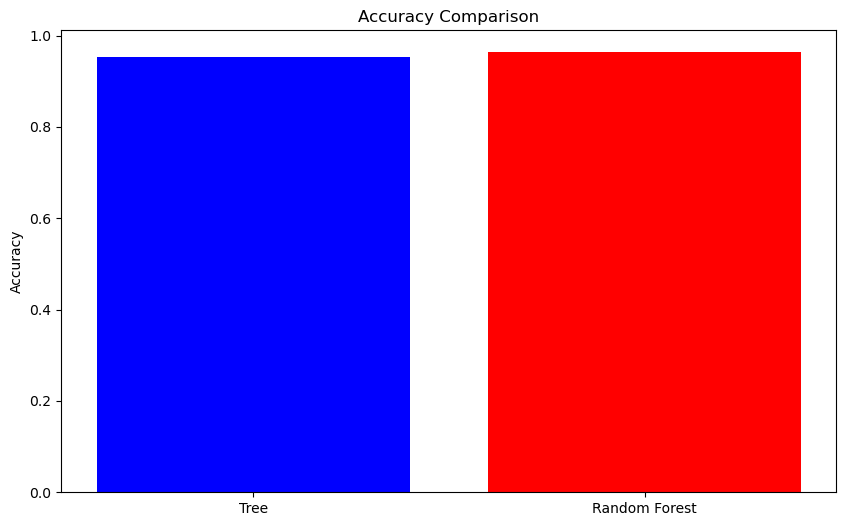

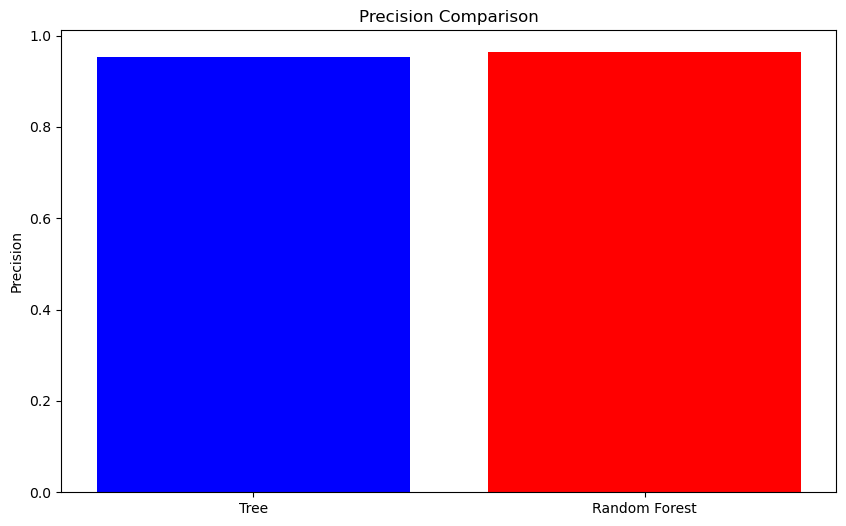

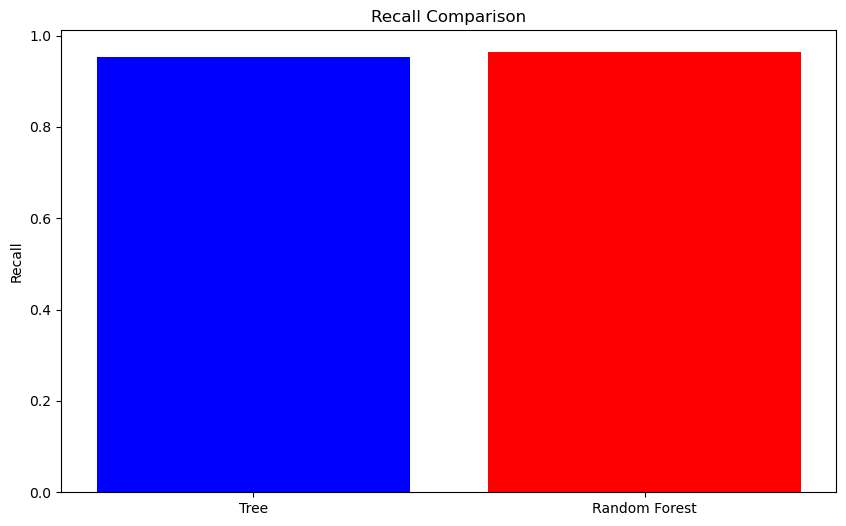

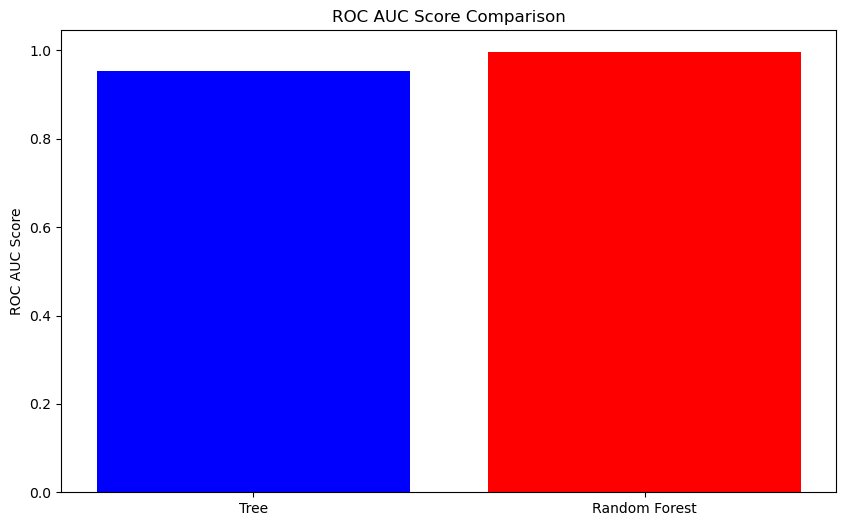

In [88]:
# Compparing the test of the models to eachother creating individual plots for each metric

# F1 Score
plt.figure(figsize=(10, 6))
plt.bar(["Tree", "Random Forest"], [f1_tc, f1_rf], color=['blue', 'red'])
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()

# Accuracy
plt.figure(figsize=(10, 6))
plt.bar(["Tree", "Random Forest"], [accuracy_tc, accuracy_rf], color=['blue', 'red'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Precision
plt.figure(figsize=(10, 6))
plt.bar(["Tree", "Random Forest"], [precision_tc, precision_rf], color=['blue', 'red'])
plt.title("Precision Comparison")
plt.ylabel("Precision")
plt.show()

# Recall
plt.figure(figsize=(10, 6))
plt.bar(["Tree", "Random Forest"], [recall_tc, recall_rf], color=['blue', 'red'])
plt.title("Recall Comparison")
plt.ylabel("Recall")
plt.show()

# ROC AUC Score
plt.figure(figsize=(10, 6))
plt.bar(["Tree", "Random Forest"], [roc_auc_tc, roc_auc_rf], color=['blue', 'red'])
plt.title("ROC AUC Score Comparison")
plt.ylabel("ROC AUC Score")
plt.show()
